In [891]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib as plot
from matplotlib import pyplot as plt
import folium
import seaborn as sns
import requests
import warnings
warnings.filterwarnings(action="ignore")

In [898]:
# to change the os path
os.chdir("C:\A-Personal\AI2\CourseaProjects\DA-1\Class3-Week4")
df_Full = pd.read_csv("traffic-collision-data-from-2010-to-present.csv")

# About the project
### This project is about the traffic collision 
- By study and analysis the feature of the collision,  the trend of it can be known and displayed
- This result can assist to improve people to comprehend and avoid the collision or at least to have a alert about the collision in advance

# About the data
### The data for study in this project is from <a href=https://www.kaggle.com/cityofLA/los-angeles-traffic-collision-data>Kaggle</a>
- The data is base on Los Angeles America
- The data duration is from 2010 Jan to 2019 Jun
- The data structure is as below: (more detail and defination about the data, pls refer above link of Kaggle)
    - DR Number
    - Date Reported , Date Occurred ,Time Occurred
    - Area ID , Area Name
    - Reporting District
    - Crime Code , Crime Code Description
    - MO Codes
    - Victim Age , Victim Sex , Victim Descent
    - Premise Code , Premise Description
    - Address , Cross Street , Location , Zip Codes
    - Census Tracts
    - Precinct Boundaries
    - LA Specific Plans
    - Council Districts
    - Neighborhood Councils (Certified)

### According to the data field name, it contains the information below:
- The date time about the accident, which can help to show the trend on occurency by time line
- The location of the accident, which can help to study which area is the high protencially occur the accident
- The victim information, which can help to study the trend about the vinctim on age, race

# 1- Data overview
### Below is the shape of the data and display the sample of it

In [899]:
print("the rows and cols count are ",df_Full.shape)
df_Full.head(5)

the rows and cols count are  (476337, 24)


DR Number            Date Reported            Date Occurred  Time Occurred  \
0  191216137  2019-06-15T00:00:00.000  2019-06-15T00:00:00.000            330   
1  191011095  2019-06-15T00:00:00.000  2019-06-15T00:00:00.000           1425   
2  190411077  2019-06-15T00:00:00.000  2019-06-15T00:00:00.000           1200   
3  190511313  2019-06-15T00:00:00.000  2019-06-15T00:00:00.000            850   
4  191814225  2019-06-15T00:00:00.000  2019-06-15T00:00:00.000            435   

   Area ID    Area Name  Reporting District  Crime Code  \
0       12  77th Street                1203         997   
1       10  West Valley                1017         997   
2        4   Hollenbeck                 469         997   
3        5       Harbor                 504         997   
4       18    Southeast                1846         997   

  Crime Code Description                            MO Codes  ...  \
0      TRAFFIC COLLISION            4025 3028 3101 3006 3030  ...   
1      TRAFFIC COLLISION                                 NaN  ...   
2      TRAFFIC COLLISION  4024 3036 3004 3026 3034 3029 3101  ...   
3      TRAFFIC COLLISION                                 NaN  ...   
4      TRAFFIC COLLISION            4025 3028 3101 3006 3030  ...   

   Premise Description                                   Address  \
0               STREET           52ND                         ST   
1          PARKING LOT  17200    SATICOY                      ST   
2               STREET           4TH                          ST   
3               STREET   1600 W  207TH                        ST   
4               STREET           EVERS                        AV   

                      Cross Street  \
0  WESTERN                      AV   
1                              NaN   
2  INDIANA                      ST   
3                              NaN   
4  111TH                        ST   

                                            Location Zip Codes Census Tracts  \
0  {'longitude': '-118.3089', 'latitude': '33.995...   24027.0         742.0   
1  {'longitude': '-118.5077', 'latitude': '34.208...   19734.0         259.0   
2  {'longitude': '-118.1924', 'latitude': '34.032...   24028.0         516.0   
3  {'longitude': '-118.3066', 'latitude': '33.842...   25715.0         944.0   
4  {'longitude': '-118.2473', 'latitude': '33.934...   24354.0         821.0   

  Precinct Boundaries LA Specific Plans  Council Districts  \
0              1049.0               7.0               14.0   
1               315.0               NaN                3.0   
2               956.0               NaN                9.0   
3               825.0               NaN               15.0   
4              1186.0               7.0               15.0   

   Neighborhood Councils (Certified)  
0                               35.0  
1                               61.0  
2                               38.0  
3                               55.0  
4                               40.0  

[5 rows x 24 columns]

# 2- Data cleaning
### Base on the defination of from <a href=https://www.kaggle.com/cityofLA/los-angeles-traffic-collision-data>Kaggle</a>
- Some field can be dropped from data set due to there is no clearly explaination / defination or useless for study
    - All crime codes and crime code descriptions are same in the dataset
    - No description about Census Tracts , Precinct Boundaries , LA Specific Plans , Council Districts , Neighborhood Councils

2.1- To drop above columns from the data set

In [900]:
df_Full = df_Full.drop(
    ["Crime Code","Crime Code Description","Census Tracts","Precinct Boundaries","LA Specific Plans",
     "Council Districts","Neighborhood Councils (Certified)","Zip Codes"],axis=1)

2.2- To pring the columns again after deletion

In [901]:
print(df_Full.columns)

# reset the column names
df_Full.columns = ['DR_Number', 'Date_Reported', 'Date_Occurred', 'Time_Occurred',
       'Area_ID', 'Area_Name', 'Reporting_District', 'MO_Codes', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Address', 'Cross_Street', 'Location']
df_Full.head(1)

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Address', 'Cross Street', 'Location'],
      dtype='object')


DR_Number            Date_Reported            Date_Occurred  Time_Occurred  \
0  191216137  2019-06-15T00:00:00.000  2019-06-15T00:00:00.000            330   

   Area_ID    Area_Name  Reporting_District                  MO_Codes  \
0       12  77th Street                1203  4025 3028 3101 3006 3030   

   Victim_Age Victim_Sex Victim_Descent  Premise_Code Premise_Description  \
0        39.0          F              B         101.0              STREET   

                           Address                     Cross_Street  \
0  52ND                         ST  WESTERN                      AV   

                                            Location  
0  {'longitude': '-118.3089', 'latitude': '33.995...

### Handle date time value
- Base on above value on Date_Reported and Date_Occurred, the value is not quiet convenience to aggregate in further analysis, to split the value as below for more convenience:
    - Reported year/month/day from Date_Reported
    - Occur year/month/day from Date_Occurred
    - Classify the time period by every 3 hours as time zone, convenience for futher classification by time zone
    - Add week day information base on Date_Occurred, convenience for futher classification by week day

2.3- Add columns for datetime split and show the result

In [902]:
df_Full["Report_Year"] = df_Full["Date_Reported"].str[:4]
df_Full["Report_Month"] = df_Full["Date_Reported"].str[5:7]
df_Full["Report_Day"] = df_Full["Date_Reported"].str[8:10]

df_Full["Occur_Year"] = df_Full["Date_Occurred"].str[:4]
df_Full["Occur_Month"] = df_Full["Date_Occurred"].str[5:7]
df_Full["Occur_Day"] = df_Full["Date_Occurred"].str[8:10]

df_Full["Date_Reported"] = pd.to_datetime(df_Full["Date_Reported"])
df_Full["Date_Occurred"] = pd.to_datetime(df_Full["Date_Occurred"])
df_Full["WeekDay"] = df_Full.Date_Occurred.dt.dayofweek

# classification the time period
# To seperate the timing to 8 group:
# - Mid night(0000-0300] : 1
# - Early morning(0300-0600] : 2
# - Morning(0600-0900] : 3
# - Nearly noon(0900-1200] : 4
# - Late noon(1200-0300] : 5
# - Afternoon(0300-0600] : 6
# - Evening(0600-0900] : 7
# - Early Night(0900-0000] : 8
def ConvertClass(value):
    classID = {300:1,600:2,900:3,1200:4,1500:5,1800:6,2100:7,2400:8}
    for key,classValue in classID.items():
        if value < key :
            return classValue
df_Full["TimingClass"] = df_Full["Time_Occurred"].apply(ConvertClass)
df_Full[["TimingClass","Time_Occurred"]].head()

df_Full[["Date_Reported","Date_Occurred","Report_Year","Report_Month","Report_Day","TimingClass"]].head()

Date_Reported Date_Occurred Report_Year Report_Month Report_Day  TimingClass
0    2019-06-15    2019-06-15        2019           06         15            2
1    2019-06-15    2019-06-15        2019           06         15            5
2    2019-06-15    2019-06-15        2019           06         15            5
3    2019-06-15    2019-06-15        2019           06         15            3
4    2019-06-15    2019-06-15        2019           06         15            2

### Handle location value
- The most useful location information is the longtitue and latitue, will extract these two values of each record from location column

2.4- To setup the longtitue and latitue information seperatly from location

In [903]:
# To get the longtitue and latutude from Location field
def GetLocation(value):
    result = value.split(',')[0]+','+value.split(',')[1]+'}'
    return json.loads(result.replace("'",'"'))
    
df_Full["Longtitue"] = df_Full["Location"].apply(lambda x: GetLocation(x)["longitude"])
df_Full["Latitude"] = df_Full["Location"].apply(lambda x:  GetLocation(x)["latitude"])
df_Full[["Location","Longtitue","Latitude"]].head()

Location  Longtitue Latitude
0  {'longitude': '-118.3089', 'latitude': '33.995...  -118.3089  33.9951
1  {'longitude': '-118.5077', 'latitude': '34.208...  -118.5077  34.2084
2  {'longitude': '-118.1924', 'latitude': '34.032...  -118.1924   34.032
3  {'longitude': '-118.3066', 'latitude': '33.842...  -118.3066  33.8429
4  {'longitude': '-118.2473', 'latitude': '33.934...  -118.2473  33.9348

In [904]:
# After data conversion, delete location field
df_Full = df_Full.drop(["Location"],axis=1)

### Handle victim features
- The value of sex and descent are all short name, update the value as full name which will be more convenience for data display in further
    - The sex code:
        - F: Female
        - M: Male
        
    - base on Victim Descent Code: 
        - A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino 
        - G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native 
        - J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan 
        - U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

- And for vinctim age, to classificate the value by 10 year as one bin

2.5- To update values for victim sex and descent

In [905]:
# To convert the value for Victim Sex
def ConverValueForSex(value):
    if(value=="F"):
        return "Female"
    elif(value=="M"):
        return "Male"
    else:
        return value
df_Full["Victim_Sex"] = df_Full["Victim_Sex"].apply(ConverValueForSex)
df_Full["Victim_Sex"].head()

0    Female
1      Male
2      Male
3    Female
4      Male
Name: Victim_Sex, dtype: object

In [906]:
# to do conversion
def ConversionDescentCode(value):
    dictDescent = {"A":"Other Asian","B":"Black","C":"Chinese","D":"Cambodian","F":"Filipino","G":"Guamanian",
               "H":"Hispanic/Latin/Mexican","I":"American Indian/Alaskan Native",
               "J":"Japanese","K":"Korean","L":"Laotian","O":"Other","P":"Pacific Islander",
               "S":"Samoan","U":"Hawaiian","V":"Vietnamese","W":"White","X":"Unknown","Z":"Asian Indian"
              }
    for key,descent in dictDescent.items():
        if(value != key):
            continue
        return dictDescent[value]
    
df_Full["Victim_Descent"] = df_Full["Victim_Descent"].apply(ConversionDescentCode)
df_Full["Victim_Descent"].head()

0                     Black
1                     White
2    Hispanic/Latin/Mexican
3    Hispanic/Latin/Mexican
4    Hispanic/Latin/Mexican
Name: Victim_Descent, dtype: object

2.6- Classificate the victim age by 10 year as one bin

In [907]:
# To add the classification for the ages
def ConvertAge(value):
    dictAge = {
        20:"10-20",30:"20-30",40:"30-40",50:"40-50",60:"50-60",70:"60-70",80:"70-80",
        90:"80-90",100:"90-100"
    }
    for age,group in dictAge.items():
        if value <= age:
            return group
df_Full["Victim_Age_Group"] = df_Full["Victim_Age"].apply(ConvertAge)
df_Full[["Victim_Age","Victim_Age_Group"]].head()

Victim_Age Victim_Age_Group
0        39.0            30-40
1        30.0            20-30
2        69.0            60-70
3        39.0            30-40
4        60.0            50-60

### Handle MO code
- The mo code is the activities associated with the suspect in commission of the crime, most of the records have mutiple MO code
- The major MO code are 3001-3023: representing the cases xxx vs xxx 

2.7- Get the major MO code from original value, and no change is it only has one code originally

In [908]:
# get the major Mo codes for the cases
def ConvertMOCode(value):
    moCodeList = str(value).split(' ')
    moCodeList.sort()
    result = None
    temp = None
    for item in moCodeList:
        if item > "3023":
            temp = item
            continue
        result = item
    if(result==None) and (temp!=None):
        result = temp
    return result

df_Full["MajorMoCode"] = df_Full["MO_Codes"].apply(ConvertMOCode)
df_Full[df_Full["MO_Codes"].isna()==False][["MO_Codes","MajorMoCode"]].head()

MO_Codes MajorMoCode
0             4025 3028 3101 3006 3030        3006
2   4024 3036 3004 3026 3034 3029 3101        3004
4             4025 3028 3101 3006 3030        3006
10                                0605        0605
14                                0605        0605

### Handle NaN value
- As blow query, there are lots value on the fields are NaN, by compare the total rows of whole data set, will remove below records with NaN on these two fields
    - Premise_Code
    - Premise_Description

2.8- To get the columns which contains NaN values

In [909]:
df_tmp = df_Full.isna().sum().sort_values(ascending=False).to_frame()
df_tmp[df_tmp[0]>0]

0
MO_Codes             84875
Victim_Age           77418
Victim_Age_Group     77418
Cross_Street         21138
Victim_Descent        7635
Victim_Sex            6928
Premise_Code            25
Premise_Description     25

2.9- Remove the records

In [910]:
# The premise code and its Description seems only with 25 rows which is very tiny size of total data
# so drop the records directly
df_Full.drop(df_Full[df_Full["Premise_Code"].isna()].index,inplace=True)
df_Full.drop(df_Full[df_Full["Premise_Description"].isna()].index,inplace=True)

# to check again after deletion
print("The total rows of Premise Code with NaN:" , df_Full[df_Full["Premise_Code"].isna()].shape[0])
print("The total rows of Premise Description with NaN:" , df_Full[df_Full["Premise_Description"].isna()].shape[0])

The total rows of Premise Code with NaN: 0
The total rows of Premise Description with NaN: 0


------------------------------

# 3- Data analysis

### Analysis with date time features
- The date time feature is the best way to understand the trend of accident visualized, the plot below will contains:
    - Accident trend per year
    - Accident trend per month under each year
    - Accident trend per week day under each month
    - Accident trend per hours under each week day

3.1- Accident trend per year

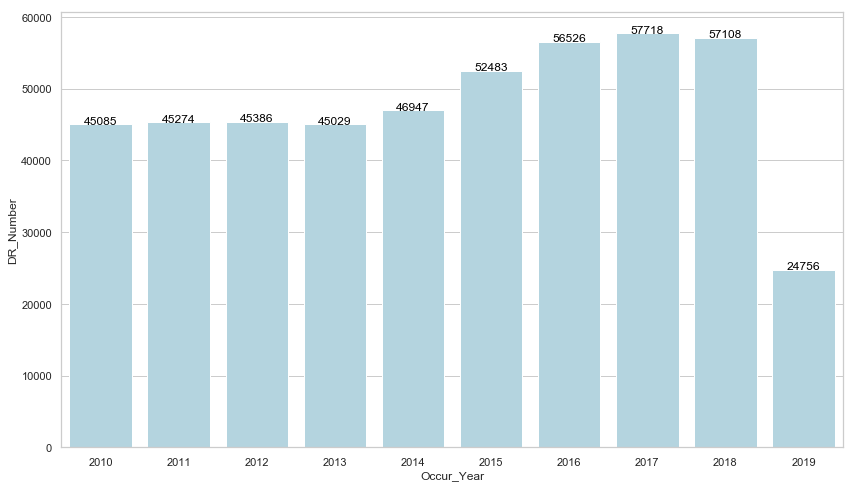

In [911]:
df_TotalPerYear = df_Full.groupby("Occur_Year").count()[["DR_Number"]].reset_index(["Occur_Year"])
f, ax = plt.subplots(figsize=(14,8))
sns.set(style="whitegrid")
showPlot = sns.barplot(data=df_TotalPerYear,x="Occur_Year",y="DR_Number",color="lightblue")
for index,values in df_TotalPerYear.iterrows():
    showPlot.text(values.name,values["DR_Number"],values["DR_Number"],color="black",ha="center")
plt.show()

3.1.end- The information from above plot:
- The cases are increased since 2010 - 2017/2018
- It increased rapidly from 2014->2015->2016

3.2- Accident trend per month under each year
- due to the statistic for 2019 only have half year, it might be a disturb factor while doing anaylsis with the data, split the case of 2019 from the data set
- There are three sub plots in this section:
    - trend for all months in total
    - trend for all months for each year
    - Combination of second plot

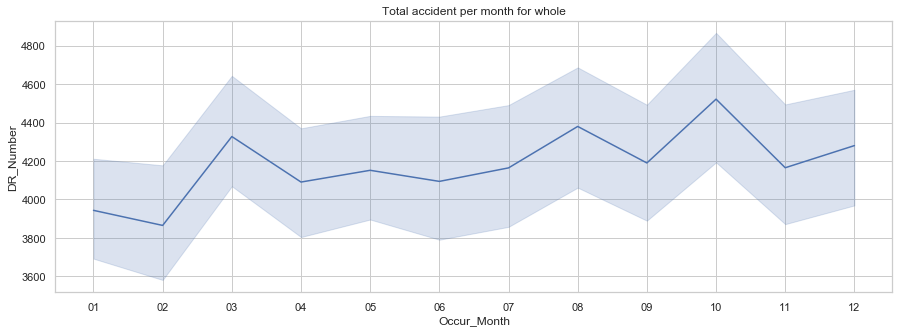

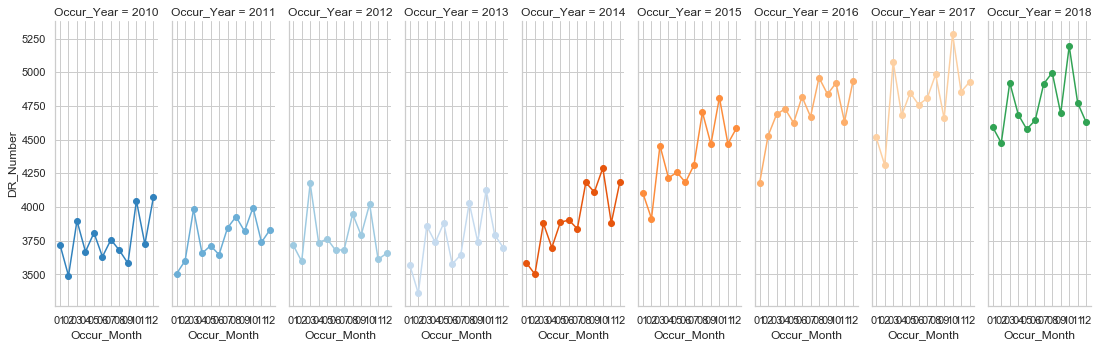

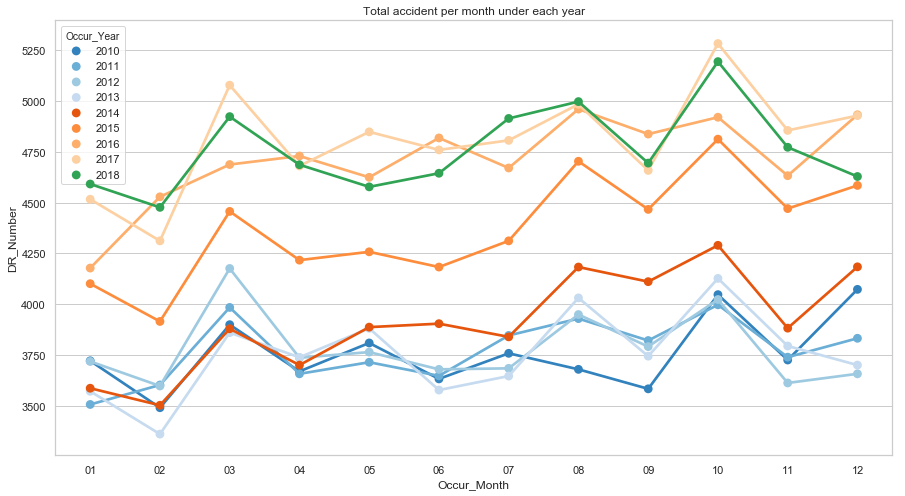

In [912]:
# Get all records expect 2019 data
df_TotalPerMonthUnderYear = df_Full.query("Occur_Year!='2019'")
# group data
df_TotalPerMonthUnderYear = df_TotalPerMonthUnderYear.groupby(["Occur_Month","Occur_Year"]).count()[["DR_Number"]]
# Get the dataframe 
df_TotalPerMonthUnderYear = df_TotalPerMonthUnderYear.reset_index()

# trend for all months
f,ax = plt.subplots(figsize=(15,5))
g2 = sns.lineplot(data=df_TotalPerMonthUnderYear,x="Occur_Month",y="DR_Number",palette="tab20c")
g2.set_title("Total accident per month for whole")
plt.show()

# trend for all months for each year
grid = sns.FacetGrid(data=df_TotalPerMonthUnderYear,col="Occur_Year",hue="Occur_Year",palette="tab20c")
grid.map(plt.plot,"Occur_Month","DR_Number",marker="o")
grid.fig.set_figheight(6)
grid.fig.set_figwidth(15)


f,ax = plt.subplots(figsize=(15,8))
g = sns.pointplot(data=df_TotalPerMonthUnderYear,x="Occur_Month",y="DR_Number",hue="Occur_Year",palette="tab20c")
g.set_title("Total accident per month under each year")
plt.show()

3.2.end- The information from above plot:
- The accidents are increased compared the same month from each years 
- The accidents distributions on each month are similar, the Feb is minmun and the Oct is the maxmun for most years, it also shows the same trend on the top pic total accident per month for whole

3.3- Accident trend per week day under each month
- There are two sub plots in this section:
    - Trend of all week days on each month
    - Combination of previous plots

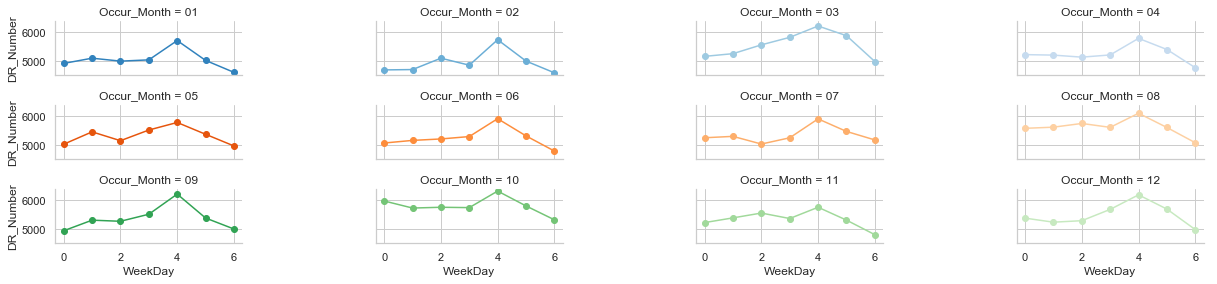

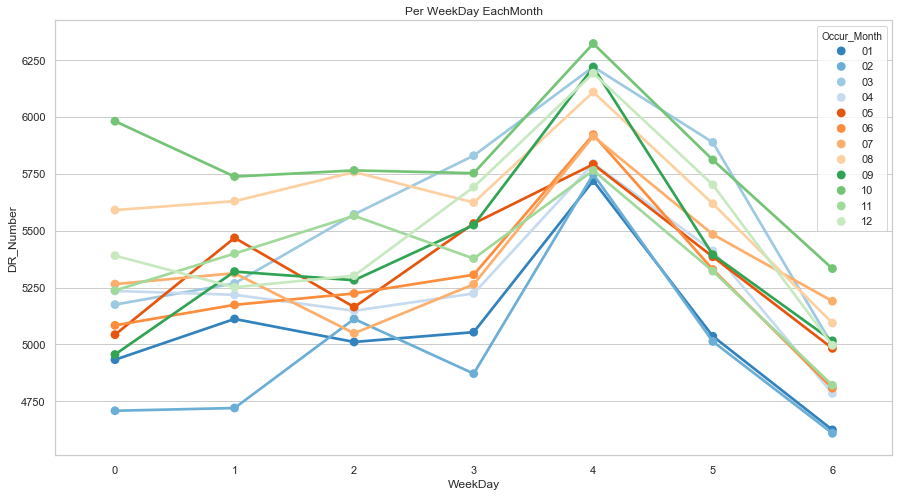

In [913]:
# data
df_PerHourOnEachMonth = df_Full.query("Occur_Year != '2019'")
df_PerHourOnEachMonth = df_PerHourOnEachMonth.groupby(["WeekDay","Occur_Month"]).count()["DR_Number"]
df_PerHourOnEachMonth = df_PerHourOnEachMonth.reset_index()

# facet
grid = sns.FacetGrid(col="Occur_Month",hue="Occur_Month",col_wrap=4,height=1.5,
                     data=df_PerHourOnEachMonth,palette="tab20c")
grid.map(plt.plot,"WeekDay","DR_Number",marker="o")
grid.fig.set_figheight(4)
grid.fig.set_figwidth(20)

f,ax = plt.subplots(figsize=(15,8))
g_perDay = sns.pointplot(data=df_PerHourOnEachMonth,x=df_PerHourOnEachMonth.WeekDay,y=df_PerHourOnEachMonth.DR_Number,
           hue=df_PerHourOnEachMonth.Occur_Month,palette="tab20c")
g_perDay.set_title("Per WeekDay EachMonth")
plt.show()

3.3.end- The information from above plots:
- The accidents distributions at each working days are similar, base on it, the Fri is the higher risk to occur accident than other work days

3.4- Accident trend per hours under each week day
- There are two sub plots in this section:
    - Trend of time zone on each week day
    - Combination of previous plots

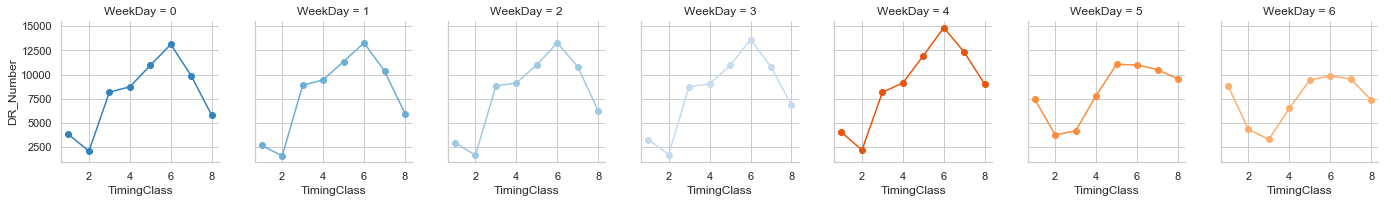

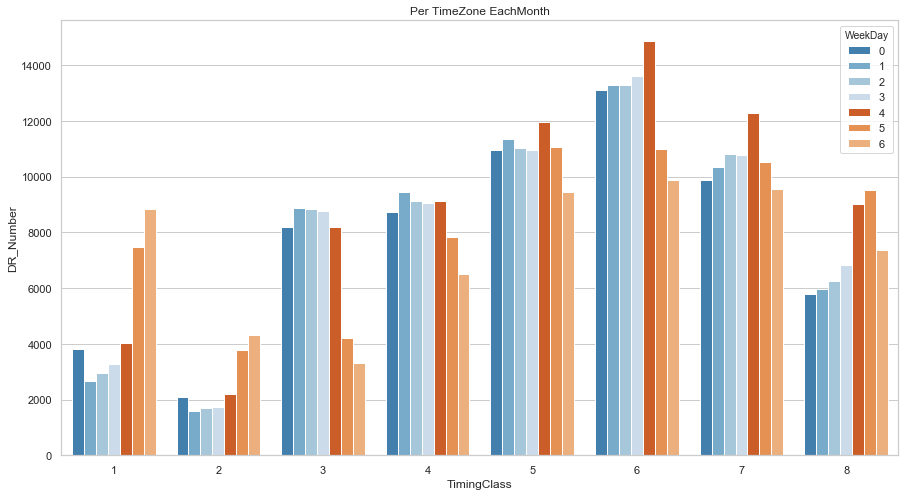

In [21]:
# data
df_PerHourOnEachMonth = df_Full.query("Occur_Year != '2019'")
df_PerHourOnEachMonth = df_PerHourOnEachMonth.groupby(["TimingClass","WeekDay"]).count()["DR_Number"]
df_PerHourOnEachMonth = df_PerHourOnEachMonth.reset_index()

# facet
grid = sns.FacetGrid(df_PerHourOnEachMonth, col="WeekDay", hue="WeekDay", palette="tab20c",
                     col_wrap=7, height=2)
grid.map(plt.plot, "TimingClass", "DR_Number", marker="o")
grid.fig.set_figheight(4)
grid.fig.set_figwidth(20)

# combination
f,ax = plt.subplots(figsize=(15,8))
g_perDay = sns.barplot(data=df_PerHourOnEachMonth,x=df_PerHourOnEachMonth.TimingClass,y=df_PerHourOnEachMonth.DR_Number,
           hue=df_PerHourOnEachMonth.WeekDay,palette="tab20c")
g_perDay.set_title("Per TimeZone EachMonth")
plt.show()

3.4.end- The information from above plots:
- The most accidents were occurred druing 15:00 - 18:00 
- At Sat since 15:00, the accidents are in high occurrence level
- At Sun, 0000-0300 and later then 1500, the accidents are in high occurrence level

### Anlysis the victim features
- The victim information mainly provide the sex , age and race of the person, so the plot below are all around these features:
    - Accident trend on different sex
    - Accident heat map on different age
    - Accident heat map on different race

3.5- Accident trend on different sex

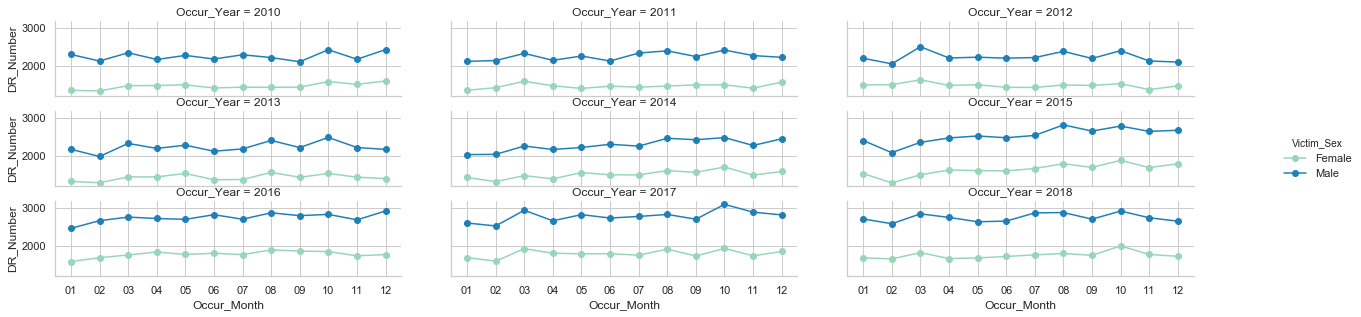

In [22]:
df_BySex_PerYear = df_Full.query("Occur_Year != '2019' and Victim_Sex in ('Male','Female')").groupby(
    ["Victim_Sex","Occur_Month","Occur_Year"]).count()["DR_Number"]
df_BySex_PerYear = df_BySex_PerYear.reset_index()
grid = sns.FacetGrid(data=df_BySex_PerYear,col="Occur_Year",hue="Victim_Sex",palette="YlGnBu",col_wrap=3)
grid.map(plt.plot,"Occur_Month","DR_Number",marker='o').add_legend()
grid.fig.set_figheight(4)
grid.fig.set_figwidth(20)

3.5.end- The information from above plots:
    - Male victim are always much more then Female
    - it's same trend for male/female along with the total accident per years

3.6- Accident heat map on different age

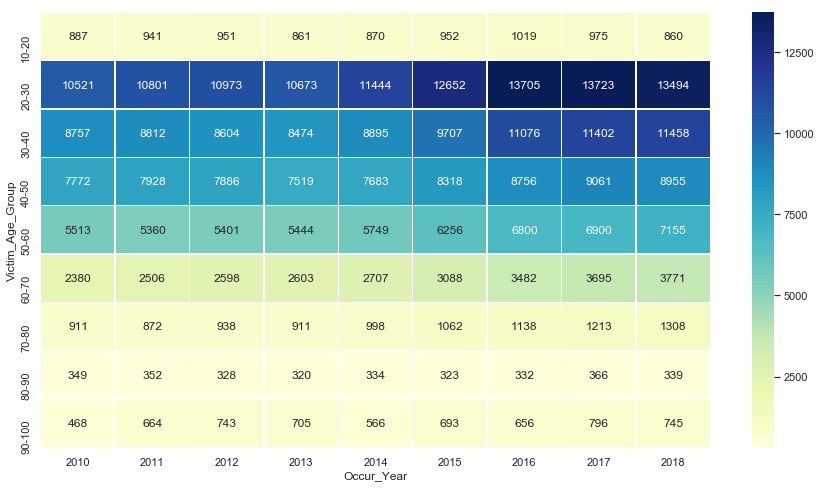

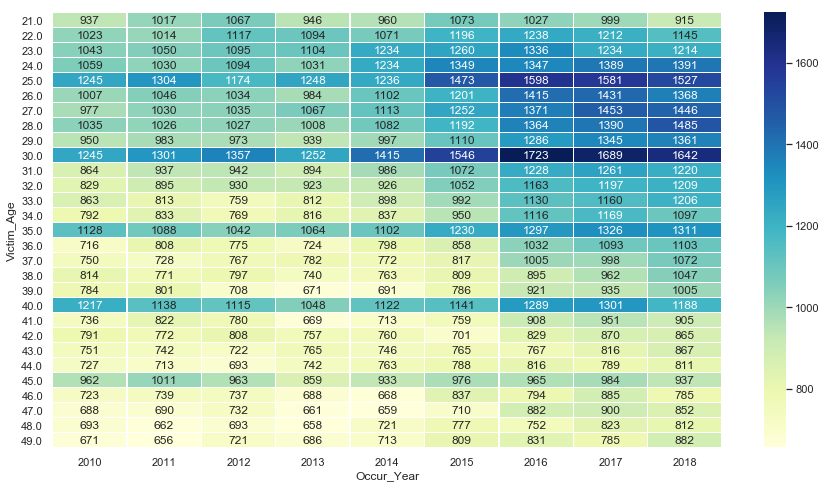

In [23]:
df_ByAge_PerYear = df_Full.query("Occur_Year != '2019'").groupby(
    ["Victim_Age_Group","Occur_Year"]).count()["DR_Number"]
df_ByAge_PerYear = df_ByAge_PerYear.reset_index()
df_ByAge_PerYear = df_ByAge_PerYear.pivot("Victim_Age_Group","Occur_Year","DR_Number")
f,ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(df_ByAge_PerYear,annot=True, fmt="d",cmap="YlGnBu",linewidths=.5)


df_ByAge_PerYear = df_Full.query("Occur_Year != '2019' and Victim_Age > 20 and Victim_Age < 50 ").groupby(
    ["Victim_Age","Occur_Year"]).count()["DR_Number"]
df_ByAge_PerYear = df_ByAge_PerYear.reset_index()
df_ByAge_PerYear = df_ByAge_PerYear.pivot("Victim_Age","Occur_Year","DR_Number")
f,ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(df_ByAge_PerYear,annot=True, fmt="d",cmap="YlGnBu",linewidths=.5)

3.6.end- The information from above plots:
    - Most victim are in age from 20-60, and 20-30 is the highest throng
    - when zoom in the range from 20-60, the higest throngs are age on 25 and 30

3.7- Accident heat map on different race

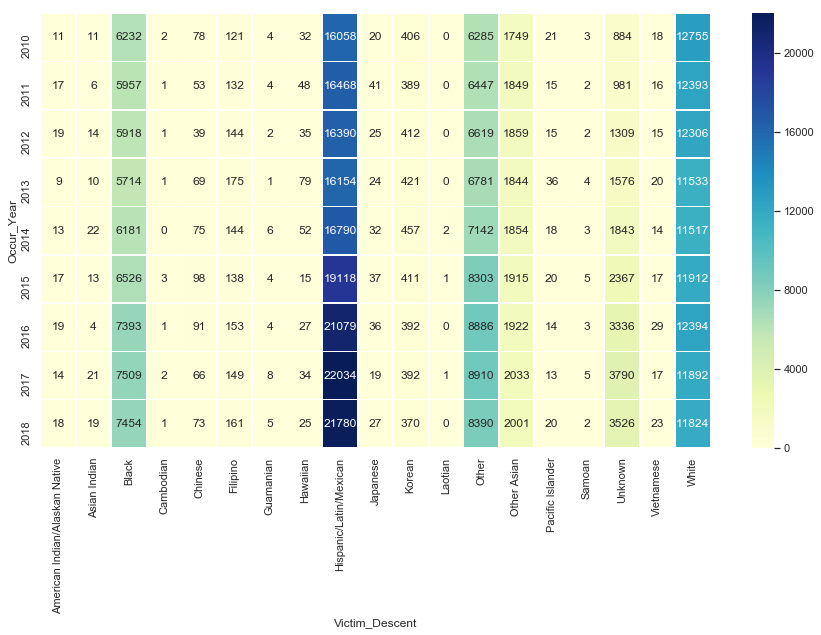

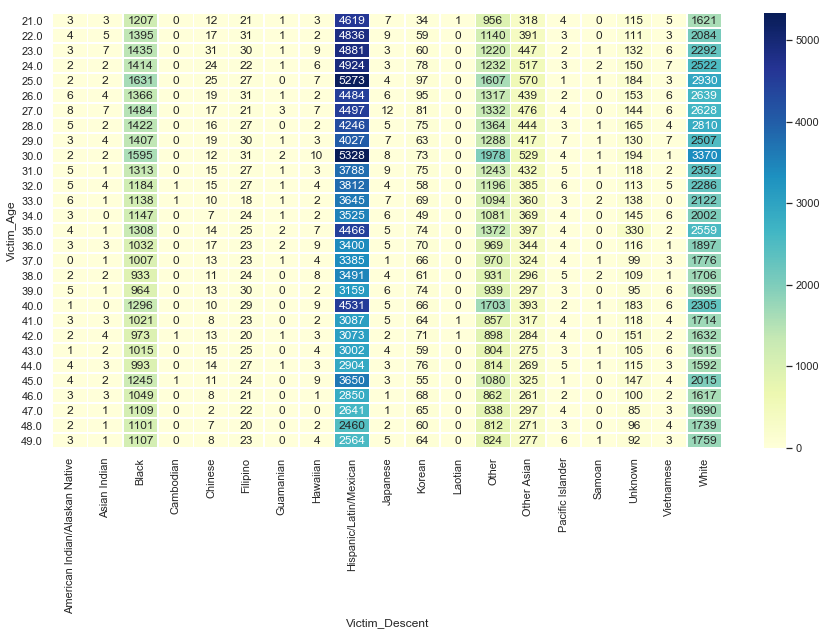

In [24]:
df_ByDescent_PerYear = df_Full.query("Occur_Year != '2019'").groupby(
    ["Victim_Descent","Occur_Year"]).count()["DR_Number"]
df_ByDescent_PerYear = df_ByDescent_PerYear.reset_index()
df_ByDescent_PerYear = df_ByDescent_PerYear.pivot("Occur_Year","Victim_Descent","DR_Number")
df_ByDescent_PerYear = df_ByDescent_PerYear.replace(np.nan,0)
df_ByDescent_PerYear = df_ByDescent_PerYear.astype("int64")
f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(data=df_ByDescent_PerYear,annot=True,fmt="d",cmap="YlGnBu",linewidths=.5)

df_ByDescent_PerYear = df_Full.query("Occur_Year != '2019' and Victim_Age > 20 and Victim_Age < 50 ").groupby(
    ["Victim_Descent","Victim_Age"]).count()["DR_Number"]
df_ByDescent_PerYear = df_ByDescent_PerYear.reset_index()
df_ByDescent_PerYear = df_ByDescent_PerYear.pivot("Victim_Age","Victim_Descent","DR_Number")
df_ByDescent_PerYear = df_ByDescent_PerYear.replace(np.nan,0)
df_ByDescent_PerYear = df_ByDescent_PerYear.astype("int64")
f,ax = plt.subplots(figsize=(15,8))
sns.heatmap(data=df_ByDescent_PerYear,annot=True,fmt="d",cmap="YlGnBu",linewidths=.5)

3.7.end- The information from above plots:
- the most race among the victim people is Hispanic/Latin/Mexican, following is White, black

### Anlysis the location by Longtitue&Latitude
- Base on previous information, it shows that it's most of the accidents are with the person between 20 ~ 50, and occurred at afternoon and mid-night
- To show the location point in the map, will narrow down the data base on these conditions

3.8- The location points with all years except 2019

In [178]:
df_ByConditions_Location = df_Full.query(
    "Occur_Year != '2019'\
    and Victim_Age > 20 and Victim_Age < 50 \
    and TimingClass in (1,5,6,7)")
df_ByConditions_Location["Longtitue"] = df_ByConditions_Location["Longtitue"].astype("float64")
df_ByConditions_Location["Latitude"] = df_ByConditions_Location["Latitude"].astype("float64")
print("The total of records is ", df_ByConditions_Location.count()["DR_Number"])
df_temp = df_ByConditions_Location.groupby(["Area_ID","Area_Name","Longtitue","Latitude"]).count()["DR_Number"].reset_index()
df_temp = df_temp.sort_values("DR_Number",ascending=False)
df_temp = df_temp.drop(df_temp[df_temp["DR_Number"]<=10].index)
print("The total of records on high frequency location",df_temp.count()["DR_Number"])

The total of records is  157040
The total of records on high frequency location 3801


In [176]:
map_clusters = folium.Map(location=[34.087994, -118.179010], zoom_start=10)
for lat, lon,label in zip(df_temp['Latitude'], df_temp['Longtitue'],df_temp["Area_Name"]):
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            fill=True,
            fill_opacity=0.7).add_to(map_clusters)
map_clusters

3.9- The location points with all years except 2019 and all week day 4

In [545]:
df_ByConditions_Location = df_Full.query(
    "Occur_Year != '2019'\
    and WeekDay == 4 \
    and Victim_Age > 20 and Victim_Age < 50 \
    and TimingClass in (1,5,6,7)")
df_ByConditions_Location["Longtitue"] = df_ByConditions_Location["Longtitue"].astype("float64")
df_ByConditions_Location["Latitude"] = df_ByConditions_Location["Latitude"].astype("float64")
print("The total of records is ", df_ByConditions_Location.count()["DR_Number"])
df_temp = df_ByConditions_Location.groupby(["Area_ID","Area_Name","Longtitue","Latitude"]).count()["DR_Number"].reset_index()
df_temp = df_temp.sort_values("DR_Number",ascending=False)
df_temp = df_temp.drop(df_temp[df_temp["DR_Number"]<=10].index)
print("The total of records on high frequency location",df_temp.count()["DR_Number"])

The total of records is  25099
The total of records on high frequency location 162


In [180]:
map_clusters = folium.Map(location=[34.087994, -118.179010], zoom_start=10)
for lat, lon,label in zip(df_temp['Latitude'], df_temp['Longtitue'],df_temp["Area_Name"]):
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            fill=True,
            fill_opacity=0.7).add_to(map_clusters)
map_clusters

3.8&3.9.end - The information from above plots:
- The distribution of two plots are similar, all points are the one occurred accident more than 10 times
- It shows the main area of the accident occurred as well

### Conclusion of the plots
- From the time line the highest risks of collision occurrence are
    - Each Oct of year
    - Each Fri of week
    - During 15:00 - 18:00 of each day, and at weekend the risk at late night and mid-night are same risk as that duration
    - Actually it remind peaple that to pay more attentions on above time zone
<br>---
- From the victim information, we can aware that
    - Male is higher risk than female 
    - Young people is higher risk than older people
    - Perhaps may be male and young is more aggressive than others and these people are eaiser to break the traffic rules no matter as driver or passenger

# 4- Data prediction
- Now most of information has show in the plots, for next step, would like to build a model which can predict the protential risk of accident occurrence
- The data for test is with last plot(3.9) data
- The Label of the protential risk of accident occurrence will be 
    - High: if there are > 10 collisions in historical
    - Low: if there are <= 10 collisions in historical

4.1- Prepare foursquare URL and data extraction functions

In [188]:
# init the information about the certification
CLIENT_ID = 'A3EBICYRNY3NN5DCUIPZTUPWHRMM5EWDZPXOZW4PIDZH0BKD' 
CLIENT_SECRET = 'MA3U0L22R0YELKNWSTDRGQ3ZXJQRPJKZKXSBX0ZVHBIRUOA1' 
VERSION = '20190709' 
LIMIT = 100
radius = 100
neighborhood_latitude = '43.65426'
neighborhood_longitude = '-79.360636'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('The URL:' + url)

Your credentails:
CLIENT_ID: A3EBICYRNY3NN5DCUIPZTUPWHRMM5EWDZPXOZW4PIDZH0BKD
CLIENT_SECRET:MA3U0L22R0YELKNWSTDRGQ3ZXJQRPJKZKXSBX0ZVHBIRUOA1
The URL:https://api.foursquare.com/v2/venues/explore?&client_id=A3EBICYRNY3NN5DCUIPZTUPWHRMM5EWDZPXOZW4PIDZH0BKD&client_secret=MA3U0L22R0YELKNWSTDRGQ3ZXJQRPJKZKXSBX0ZVHBIRUOA1&v=20190709&ll=43.65426,-79.360636&radius=100&limit=100


In [189]:
# function to get the information near by the location
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},\
        {}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

4.2- Prepare High risk cases

In [190]:
# the df_temp data set the is data from 3.9 plot, and get near by information from foursquare base on lat&lgt
locationNearByInfo = getNearbyVenues(df_temp["Area_Name"],df_temp["Latitude"],df_temp["Longtitue"])

In [524]:
print("Shape of data set is:",locationNearByInfo.shape)
locationNearByInfo.head()

Shape of data set is: (4791, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude           Venue  \
0      Mission                34.2216               -118.4488          Toto's   
1      Mission                34.2216               -118.4488  DJ Bibingkahan   
2      Mission                34.2216               -118.4488        T-Mobile   
3      Mission                34.2216               -118.4488          SUBWAY   
4      Mission                34.2216               -118.4488             GNC   

   Venue Latitude  Venue Longitude       Venue Category  
0       34.221767      -118.448044  Filipino Restaurant  
1       34.221964      -118.447283  Filipino Restaurant  
2       34.223453      -118.449568    Mobile Phone Shop  
3       34.221795      -118.446903       Sandwich Place  
4       34.222111      -118.449592      Supplement Shop

In [203]:
# to use the Venue information as features for a location
locationNearByInfo.groupby("Venue Category").count().sort_values(by="Neighborhood",ascending=False).head()

Neighborhood  Neighborhood Latitude  \
Venue Category                                              
Coffee Shop                    180                    180   
Mexican Restaurant             169                    169   
Fast Food Restaurant           164                    164   
Sandwich Place                 129                    129   
Pizza Place                    126                    126   

                      Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                        
Coffee Shop                              180    180             180   
Mexican Restaurant                       169    169             169   
Fast Food Restaurant                     164    164             164   
Sandwich Place                           129    129             129   
Pizza Place                              126    126             126   

                      Venue Longitude  
Venue Category                         
Coffee Shop                       180  
Mexican Restaurant                169  
Fast Food Restaurant              164  
Sandwich Place                    129  
Pizza Place                       126

In [856]:
# To combine similar Venues by key words of Venue category
def VenueConversion(x):
    list_Class = ["Store","Shop","Bar","Restaurant","Place","Bank","Café","Hotel","Pharmacy","Bakery",
                 "Supermarket","Gym","Studio","Joint","Lounge","Club","Mall","Food","Venue",
                 "Park","Spot","Station","Theater","pub","Spa","Boutique"]
    for item in list_Class:
        if x.lower().find(item.lower())>=0:
            return item
    return "Others"

4.2.1- Data conversion on High risk data

In [857]:
# to Add new columns in the data set after  VenueConversion function washed
df_temp_convert = locationNearByInfo.copy()
df_temp_convert["Vcat"] = df_temp_convert["Venue Category"].apply(VenueConversion)
df_temp_convert.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude           Venue  \
0      Mission                34.2216               -118.4488          Toto's   
1      Mission                34.2216               -118.4488  DJ Bibingkahan   
2      Mission                34.2216               -118.4488        T-Mobile   
3      Mission                34.2216               -118.4488          SUBWAY   
4      Mission                34.2216               -118.4488             GNC   

   Venue Latitude  Venue Longitude       Venue Category        Vcat  
0       34.221767      -118.448044  Filipino Restaurant  Restaurant  
1       34.221964      -118.447283  Filipino Restaurant  Restaurant  
2       34.223453      -118.449568    Mobile Phone Shop        Shop  
3       34.221795      -118.446903       Sandwich Place       Place  
4       34.222111      -118.449592      Supplement Shop        Shop

In [858]:
# Turn all Vcat information as a columns for the data set and combin with original Longtitue&Latitude of location
locationNearByInfo_GetDummy = pd.get_dummies(df_temp_convert[["Vcat"]],prefix="",prefix_sep="")
locationNearByInfo_GetDummy["Neighborhood"] = locationNearByInfo["Neighborhood"]
locationNearByInfo_GetDummy["Latitude"] = locationNearByInfo["Neighborhood Latitude"]
locationNearByInfo_GetDummy["Longitude"] = locationNearByInfo["Neighborhood Longitude"]
locationNearByInfo_GetDummy = locationNearByInfo_GetDummy.groupby(["Latitude","Longitude"]).sum().reset_index()

locationNearByInfo_HighRisk = pd.merge(df_temp,locationNearByInfo_GetDummy,how="inner"
                                       ,left_on=["Longtitue","Latitude"],
                                       right_on=["Longitude","Latitude"])
print(locationNearByInfo_HighRisk.shape)
locationNearByInfo_HighRisk.head()

(162, 32)


Area_ID    Area_Name  Longtitue  Latitude  DR_Number  Longitude  Bakery  \
0       19      Mission  -118.4488   34.2216         42  -118.4488       0   
1       12  77th Street  -118.3089   33.9892         33  -118.3089       0   
2       17   Devonshire  -118.5536   34.2355         28  -118.5536       2   
3        9     Van Nuys  -118.4662   34.1721         26  -118.4662       0   
4       17   Devonshire  -118.5361   34.2355         24  -118.5361       1   

   Bank  Bar  Boutique  ...  Shop  Spa  Spot  Station  Store  Studio  \
0     2    0         0  ...     7    0     0        0      9       0   
1     0    1         0  ...     2    0     1        0      7       0   
2     0    0         0  ...    24    0     1        0     39       0   
3     0    0         0  ...     2    0     0        0      3       0   
4     2    2         0  ...    10    0     0        0      3       0   

   Supermarket  Theater  Venue  pub  
0            0        0      0    0  
1            0        0      0    0  
2            0        0      0    0  
3            0        0      1    0  
4            0        0      0    0  

[5 rows x 32 columns]

4.3- Prepare low risk cases

In [256]:
# to prepare the low risk data, which same conditions with High cases except only get the location occurred
# accident <= 10 on over 9 years
df_ByConditions_Location = df_Full.query(
    "Occur_Year != '2019'\
    and WeekDay == 4 \
    and Victim_Age > 20 and Victim_Age < 50 \
    and TimingClass in (1,5,6,7)")
df_ByConditions_Location["Longtitue"] = df_ByConditions_Location["Longtitue"].astype("float64")
df_ByConditions_Location["Latitude"] = df_ByConditions_Location["Latitude"].astype("float64")
print("The total of records is ", df_ByConditions_Location.count()["DR_Number"])
df_temp_lowCases = df_ByConditions_Location.groupby(["Area_ID","Area_Name","Longtitue","Latitude"]).count()["DR_Number"].reset_index()
df_temp_lowCases = df_temp_lowCases.sort_values("DR_Number",ascending=False)
df_temp_lowCases = df_temp_lowCases.drop(df_temp_lowCases[df_temp_lowCases["DR_Number"]>10].index)
print("The total of records on high frequency location",df_temp_lowCases.count()["DR_Number"])

The total of records is  25099
The total of records on high frequency location 11555


In [264]:
df_Final_lowCases = df_temp_lowCases.sort_values(by="DR_Number").query("DR_Number==1").sample(frac=0.024475)
print("The low risk localtion for test is total: ",df_Final_lowCases.shape)
df_Final_lowCases.head()

The low risk localtion for test is total:  (164, 5)


Area_ID    Area_Name  Longtitue  Latitude  DR_Number
6294       12  77th Street  -118.3171   33.9600          1
495         2      Rampart  -118.2956   34.0777          1
4762        9     Van Nuys  -118.4486   34.1667          1
7218       13       Newton  -118.2589   34.0127          1
543         2      Rampart  -118.2857   34.0690          1

In [265]:
# get near by information from foursquare base on lat&lgt
locationNearByInfo_LowRiskCases = getNearbyVenues(df_Final_lowCases["Area_Name"]
                                                  ,df_Final_lowCases["Latitude"],df_Final_lowCases["Longtitue"])

In [269]:
print("Shape of data set is:",locationNearByInfo_LowRiskCases.shape)
print(locationNearByInfo_LowRiskCases.head())
locationNearByInfo_LowRiskCases.groupby("Venue Category").count().sort_values(by="Neighborhood",ascending=False).head()

Shape of data set is: (3378, 7)
  Neighborhood  Neighborhood Latitude  Neighborhood Longitude        Venue  \
0  77th Street                  33.96               -118.3171     Wingstop   
1  77th Street                  33.96               -118.3171      Kinly's   
2  77th Street                  33.96               -118.3171  Dollar Tree   
3  77th Street                  33.96               -118.3171    Taco Bell   
4  77th Street                  33.96               -118.3171    LA Lounge   

   Venue Latitude  Venue Longitude        Venue Category  
0       33.960266      -118.319643           Wings Joint  
1       33.959753      -118.313553            Donut Shop  
2       33.959660      -118.321380        Discount Store  
3       33.959646      -118.314625  Fast Food Restaurant  
4       33.960253      -118.321478            Hobby Shop  


Neighborhood  Neighborhood Latitude  \
Venue Category                                              
Coffee Shop                    140                    140   
Mexican Restaurant             138                    138   
Pizza Place                     93                     93   
Sandwich Place                  71                     71   
Fast Food Restaurant            68                     68   

                      Neighborhood Longitude  Venue  Venue Latitude  \
Venue Category                                                        
Coffee Shop                              140    140             140   
Mexican Restaurant                       138    138             138   
Pizza Place                               93     93              93   
Sandwich Place                            71     71              71   
Fast Food Restaurant                      68     68              68   

                      Venue Longitude  
Venue Category                         
Coffee Shop                       140  
Mexican Restaurant                138  
Pizza Place                        93  
Sandwich Place                     71  
Fast Food Restaurant               68

4.3.1- Data conversion on Low risk data

In [859]:
df_temp_convert_lower = locationNearByInfo_LowRiskCases.copy()
df_temp_convert_lower["Vcat"] = df_temp_convert_lower["Venue Category"].apply(VenueConversion)
df_temp_convert_lower.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude        Venue  \
0  77th Street                  33.96               -118.3171     Wingstop   
1  77th Street                  33.96               -118.3171      Kinly's   
2  77th Street                  33.96               -118.3171  Dollar Tree   
3  77th Street                  33.96               -118.3171    Taco Bell   
4  77th Street                  33.96               -118.3171    LA Lounge   

   Venue Latitude  Venue Longitude        Venue Category        Vcat  
0       33.960266      -118.319643           Wings Joint       Joint  
1       33.959753      -118.313553            Donut Shop        Shop  
2       33.959660      -118.321380        Discount Store       Store  
3       33.959646      -118.314625  Fast Food Restaurant  Restaurant  
4       33.960253      -118.321478            Hobby Shop        Shop

In [860]:
locationNearByInfo_LowGetDummy = pd.get_dummies(df_temp_convert_lower[["Vcat"]],prefix="",prefix_sep="")
locationNearByInfo_LowGetDummy["Neighborhood"] = locationNearByInfo_LowRiskCases["Neighborhood"]
locationNearByInfo_LowGetDummy["Latitude"] = locationNearByInfo_LowRiskCases["Neighborhood Latitude"]
locationNearByInfo_LowGetDummy["Longitude"] = locationNearByInfo_LowRiskCases["Neighborhood Longitude"]


locationNearByInfo_LowGetDummy = locationNearByInfo_LowGetDummy.groupby(["Latitude","Longitude"]).sum().reset_index()
locationNearByInfo_LowRisk = pd.merge(df_temp_lowCases,locationNearByInfo_LowGetDummy,how="inner"
                                      ,left_on=["Longtitue","Latitude"]
                                      ,right_on=["Longitude","Latitude"])

print(locationNearByInfo_LowRisk.shape)
locationNearByInfo_LowRisk.head()

(166, 32)


Area_ID    Area_Name  Longtitue  Latitude  DR_Number  Longitude  Bakery  \
0       17   Devonshire  -118.5973   34.2572          5  -118.5973       0   
1       10  West Valley  -118.5973   34.2572          1  -118.5973       0   
2       20      Olympic  -118.2857   34.0690          3  -118.2857       0   
3        2      Rampart  -118.2857   34.0690          1  -118.2857       0   
4        8      West LA  -118.4205   34.0302          2  -118.4205       0   

   Bank  Bar  Boutique  ...  Shop  Spa  Spot  Station  Store  Studio  \
0     0    1         0  ...     0    0     1        1      0       0   
1     0    1         0  ...     0    0     1        1      0       0   
2     0    0         0  ...     4    0     0        0      7       0   
3     0    0         0  ...     4    0     0        0      7       0   
4     1    0         0  ...     4    0     0        0      2       0   

   Supermarket  Theater  Venue  pub  
0            1        0      0    0  
1            1        0      0    0  
2            1        0      0    0  
3            1        0      0    0  
4            0        0      0    0  

[5 rows x 32 columns]

4.4- Build the modle
- The modle selected is logisict regression, the reasons to select it due to
    - The features are much of the data
    - The result actually is a probability on classification

In [861]:
# now we have the high risk locations and low risk location data set
# locationNearByInfo_LowRisk
# locationNearByInfo_HighRisk
# now add lable for them
locationNearByInfo_HighRisk["Risk"] = "High"
locationNearByInfo_LowRisk["Risk"] = "Low"

# combine the dataset 
locationNearByInfo_All = pd.concat([locationNearByInfo_HighRisk,locationNearByInfo_LowRisk]
                                   ,join_axes=[locationNearByInfo_LowRisk.columns])

#replace NaN to 0
locationNearByInfo_All = locationNearByInfo_All.replace(np.nan,0)

# remove longtitue and Latitude
locationNearByInfo_All.pop("Longitude")
locationNearByInfo_All.pop("Latitude")
locationNearByInfo_All.pop("Area_Name")
locationNearByInfo_All.pop("Area_ID")
locationNearByInfo_All.pop("Longtitue")
locationNearByInfo_All.pop("DR_Number")

print("The shape of the whole data is :",locationNearByInfo_All.shape)
locationNearByInfo_All.head()

The shape of the whole data is : (328, 27)


Bakery  Bank  Bar  Boutique  Café  Club  Food  Gym  Hotel  Joint  ...  Spa  \
0       0     2    0         0     0     0     1    2      0      0  ...    0   
1       0     0    1         0     0     0     1    0      0      1  ...    0   
2       2     0    0         0     0     0     0    2      0      1  ...    0   
3       0     0    0         0     0     0     0    1      2      0  ...    0   
4       1     2    2         0     0     0     0    0      0      6  ...    0   

   Spot  Station  Store  Studio  Supermarket  Theater  Venue  pub  Risk  
0     0        0      9       0            0        0      0    0  High  
1     1        0      7       0            0        0      0    0  High  
2     1        0     39       0            0        0      0    0  High  
3     0        0      3       0            0        0      1    0  High  
4     0        0      3       0            0        0      0    0  High  

[5 rows x 27 columns]

In [862]:
# create x data set and y data set
y = locationNearByInfo_All["Risk"]
df_test = locationNearByInfo_All.copy()
df_test.pop("Risk")
x = df_test

In [863]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (262, 26) (262,)
Test set: (66, 26) (66,)


In [864]:
# get the accuracy
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
y_hat = model.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_hat)

0.6212121212121212

4.5- Model verification
- The data for verify model is from 0.1% of whole data(df_Full is the full dataset from csv file directly)
- The data for verification is ramdomly choose

In [826]:
df_ByConditions_Location_verfication = df_Full.copy()
df_ByConditions_Location_verfication["Longtitue"] = df_ByConditions_Location_verfication["Longtitue"].astype("float64")
df_ByConditions_Location_verfication["Latitude"] = df_ByConditions_Location_verfication["Latitude"].astype("float64")
print("The total of records is ", df_ByConditions_Location_verfication.count()["DR_Number"])
df_temp_verfication = df_ByConditions_Location_verfication.groupby(["Area_ID"
                                                                    ,"Area_Name"
                                                                    ,"Longtitue"
                                                                    ,"Latitude"]).count()["DR_Number"].reset_index()
df_temp_verfication = df_temp_verfication.sort_values("DR_Number",ascending=False)
# df_temp_verfication = df_temp_verfication.drop(df_temp_verfication[df_temp_verfication["DR_Number"]>3].index)
print("The total of records on high frequency location",df_temp_verfication.count()["DR_Number"])
df_temp_verfication = df_temp_verfication.sample(frac=0.001)

The total of records is  476312
The total of records on high frequency location 42016


In [827]:
df_temp_verfication.head()

Area_ID    Area_Name  Longtitue  Latitude  DR_Number
29827       15  N Hollywood  -118.3704   34.1618         20
37470       19      Mission  -118.4517   34.3116          5
38699       19      Mission  -118.4112   34.3262          1
24767       13       Newton  -118.2521   34.0048         22
18124       10  West Valley  -118.4924   34.2224          1

In [828]:
# get features from foursquare
location_verification = getNearbyVenues(df_temp_verfication["Area_Name"]
                                                  ,df_temp_verfication["Latitude"],df_temp_verfication["Longtitue"])

In [829]:
location_verification.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  N Hollywood                34.1618               -118.3704   
1  N Hollywood                34.1618               -118.3704   
2  N Hollywood                34.1618               -118.3704   
3  N Hollywood                34.1618               -118.3704   
4  N Hollywood                34.1618               -118.3704   

                         Venue  Venue Latitude  Venue Longitude  \
0     Dog Haus North Hollywood       34.160636      -118.372366   
1                       teapop       34.162570      -118.370068   
2               Firehouse Subs       34.162778      -118.373524   
3  Miyako Sushi Bar Restaurant       34.160929      -118.372419   
4                    Idle Hour       34.158363      -118.370103   

     Venue Category  
0     Hot Dog Joint  
1   Bubble Tea Shop  
2    Sandwich Place  
3  Sushi Restaurant  
4               Bar

4.5.1- Data conversion for verification data

In [865]:
df_temp_convert_verify = location_verification.copy()
df_temp_convert_verify["Vcat"] = df_temp_convert_verify["Venue Category"].apply(VenueConversion)
df_temp_convert_verify.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  N Hollywood                34.1618               -118.3704   
1  N Hollywood                34.1618               -118.3704   
2  N Hollywood                34.1618               -118.3704   
3  N Hollywood                34.1618               -118.3704   
4  N Hollywood                34.1618               -118.3704   

                         Venue  Venue Latitude  Venue Longitude  \
0     Dog Haus North Hollywood       34.160636      -118.372366   
1                       teapop       34.162570      -118.370068   
2               Firehouse Subs       34.162778      -118.373524   
3  Miyako Sushi Bar Restaurant       34.160929      -118.372419   
4                    Idle Hour       34.158363      -118.370103   

     Venue Category        Vcat  
0     Hot Dog Joint       Joint  
1   Bubble Tea Shop        Shop  
2    Sandwich Place       Place  
3  Sushi Restaurant  Restaurant  
4               Bar         Bar

In [866]:
location_verification_final = pd.get_dummies(df_temp_convert_verify["Vcat"])
location_verification_final["Neighborhood"] = location_verification["Neighborhood"]
location_verification_final["Latitude"] = location_verification["Neighborhood Latitude"]
location_verification_final["Longitude"] = location_verification["Neighborhood Longitude"]

In [867]:
location_verification_final = location_verification_final.groupby(["Latitude","Longitude"]).sum().reset_index()
location_verification_final_step2 = pd.merge(df_temp_verfication,location_verification_final,how="inner"
                                      ,left_on=["Longtitue","Latitude"]
                                      ,right_on=["Longitude","Latitude"])
location_verification_final_step3 = location_verification_final_step2.copy()
location_verification_final_step3.pop("Longitude")
location_verification_final_step3.pop("Latitude")
location_verification_final_step3.pop("Area_Name")
location_verification_final_step3.pop("Area_ID")
location_verification_final_step3.pop("Longtitue")
location_verification_final_step3.pop("DR_Number")
location_verification_final_step3.head()

Bakery  Bank  Bar  Café  Club  Food  Gym  Hotel  Joint  Lounge  ...  Shop  \
0       1     1    3     0     0     0    1      0      2       1  ...    14   
1       0     0    0     0     0     1    0      0      0       0  ...     1   
2       0     0    0     0     0     0    0      0      0       0  ...     0   
3       0     0    0     0     0     1    0      0      1       0  ...     3   
4       0     0    0     0     0     0    1      0      0       0  ...     0   

   Spa  Spot  Station  Store  Studio  Supermarket  Theater  Venue  pub  
0    2     0        0      2       0            1        4      0    0  
1    0     0        0      0       0            0        0      0    0  
2    0     0        0      0       0            0        0      0    0  
3    0     0        1      0       0            0        0      0    0  
4    0     0        0      2       0            0        0      0    0  

[5 rows x 25 columns]

In [868]:
# Model data
model_data = locationNearByInfo_All.head(1).rename(index={0:-1})
location_verification_final_step4 = pd.concat([model_data,location_verification_final_step3]
                                                ,join_axes=[model_data.columns])
location_verification_final_step4 = location_verification_final_step4.replace(np.nan,0)
location_verification_final_step4 = location_verification_final_step4.drop([-1])
location_verification_final_step4.pop("Risk")
location_verification_final_step4.head()

Bakery  Bank  Bar  Boutique  Café  Club  Food  Gym  Hotel  Joint  ...  \
0       1     1    3       0.0     0     0     0    1      0      2  ...   
1       0     0    0       0.0     0     0     1    0      0      0  ...   
2       0     0    0       0.0     0     0     0    0      0      0  ...   
3       0     0    0       0.0     0     0     1    0      0      1  ...   
4       0     0    0       0.0     0     0     0    1      0      0  ...   

   Shop  Spa  Spot  Station  Store  Studio  Supermarket  Theater  Venue  pub  
0    14    2     0        0      2       0            1        4      0    0  
1     1    0     0        0      0       0            0        0      0    0  
2     0    0     0        0      0       0            0        0      0    0  
3     3    0     0        1      0       0            0        0      0    0  
4     0    0     0        0      2       0            0        0      0    0  

[5 rows x 26 columns]

In [869]:
y_hat = model.predict(location_verification_final_step4)
location_verification_final_step2["Risk"] = y_hat
location_verification_final_step2["ActualRisk"] = location_verification_final_step2["DR_Number"].apply(
    lambda x : 'High' if x>10 else 'Low'
)

In [879]:
# get the accuracy
y_actual = location_verification_final_step2["ActualRisk"].apply(lambda x : 1 if x=='High' else -1)
y_hat = location_verification_final_step2["Risk"].apply(lambda x : 1 if x=='High' else -1)
sklearn.metrics.accuracy_score(y_actual,y_hat)

0.6410256410256411